# Early Stopping
## MLP (MNIST, Tensorflow) with Early Stopping
In this tutorial, we will apply early stopping on MNIST MLP tensorflow code.a

In [1]:
import tensorflow as tf
import numpy as np
from IPython.display import Image

## MLP Architecture
here is the overview of MLP(Multi Layer Perceptron) architecture we will implement with Tensorflow

In [2]:
Image(url= "https://raw.githubusercontent.com/minsuk-heo/deeplearning/master/img/simple_mlp_mnist.png", width=500, height=250)

## Collect MNIST Data

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


train data has 60000 samples

test data has 10000 samples

every data is 28 * 28 pixels

below image shows 28*28 pixel image sample for hand written number '0' from MNIST data.

MNIST is gray scale image [0 to 255] for hand written number.

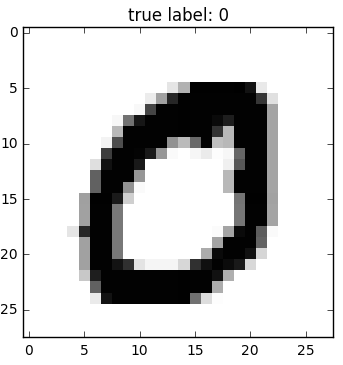


## Split train data into train and validation data
Validation during training gives advantages below,

1) check if train goes well based on validation score

2) apply early stopping when validation score doesn't improve while train score goes up (overcome overfitting)


In [5]:
x_val  = x_train[50000:60000]
x_train = x_train[0:50000]
y_val  = y_train[50000:60000]
y_train = y_train[0:50000]

In [6]:
print("train data has " + str(x_train.shape[0]) + " samples")
print("every train data is " + str(x_train.shape[1]) 
      + " * " + str(x_train.shape[2]) + " image")


train data has 50000 samples
every train data is 28 * 28 image


In [7]:
print("validation data has " + str(x_val.shape[0]) + " samples")
print("every train data is " + str(x_val.shape[1]) 
      + " * " + str(x_train.shape[2]) + " image")

validation data has 10000 samples
every train data is 28 * 28 image


In [8]:
# sample to show gray scale values
print(x_train[0][8])

[  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241
   0   0   0   0   0   0   0   0   0   0]



each train data has its label 0 to 9

In [9]:
# sample to show labels for first train data to 10th train data
print(y_train[0:9])

[5 0 4 1 9 2 1 3 1]


test data has 10000 samples

every test data is 28 * 28 image

In [10]:
print("test data has " + str(x_test.shape[0]) + " samples")
print("every test data is " + str(x_test.shape[1]) 
      + " * " + str(x_test.shape[2]) + " image")

test data has 10000 samples
every test data is 28 * 28 image


## Reshape
In order to fully connect all pixels to hidden layer,

we will reshape (28, 28) into (28x28,1) shape.

It means we flatten row x column shape to an array having 28x28 (756) items.

In [11]:
Image(url= "https://raw.githubusercontent.com/minsuk-heo/deeplearning/master/img/reshape_mnist.png", width=500, height=250)

In [12]:

x_train = x_train.reshape(50000, 784)
x_val = x_val.reshape(10000, 784)
x_test = x_test.reshape(10000, 784)

print(x_train.shape)
print(x_test.shape)

(50000, 784)
(10000, 784)


In [13]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

## Normalize data

normalization usually helps faster learning speed, better performance
by reducing variance and giving same range to all input features.
since MNIST data set all input has 0 to 255, normalization only helps reducing variances.
it turned out normalization is better than standardization for MNIST data with my MLP architeture,
I believe this is because relu handles 0 differently on both feed forward and back propagation.
handling 0 differently is important for MNIST, since 1-255 means there is some hand written,
while 0 means no hand written on that pixel.

In [14]:

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

gray_scale = 255
x_train /= gray_scale
x_val /= gray_scale
x_test /= gray_scale


## label to one hot encoding value

In [15]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [16]:

y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## Tensorflow MLP Graph
Let's implement the MLP graph with Tensorflow

In [17]:
Image(url= "https://raw.githubusercontent.com/minsuk-heo/deeplearning/master/img/simple_mlp_mnist.png", width=500, height=250)

In [19]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [20]:
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

In [21]:
def mlp(x):
    # hidden layer1
    w1 = tf.Variable(tf.random_uniform([784,256]))
    b1 = tf.Variable(tf.zeros([256]))
    h1 = tf.nn.relu(tf.matmul(x, w1) + b1)
    # hidden layer2
    w2 = tf.Variable(tf.random_uniform([256,128]))
    b2 = tf.Variable(tf.zeros([128]))
    h2 = tf.nn.relu(tf.matmul(h1, w2) + b2)
    # output layer
    w3 = tf.Variable(tf.random_uniform([128,10]))
    b3 = tf.Variable(tf.zeros([10]))
    logits= tf.matmul(h2, w3) + b3
    
    return logits

In [22]:

logits = mlp(x)

In [23]:
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=logits, labels=y))

In [24]:
train_op = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss_op)

## Early Stopping
When validation accuracy doesn't improve while train accuracy keep improves,

we can early stop the train in order to avoid overfitting.

In [25]:
Image(url= "https://raw.githubusercontent.com/minsuk-heo/deeplearning/master/img/early_stop.png", width=500, height=250)

In [26]:
# initialize
init = tf.global_variables_initializer()

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# train hyperparameters
epoch_cnt = 300
batch_size = 1000
iteration = len(x_train) // batch_size

earlystop_threshold = 5
earlystop_cnt = 0

In [27]:
# Start training
with tf.Session() as sess:
    # Run the initializer
    sess.run(init)
    prev_train_acc = 0.0
    max_val_acc = 0.0
    
    for epoch in range(epoch_cnt):
        avg_loss = 0.
        start = 0; end = batch_size
        
        for i in range(iteration):
            _, loss = sess.run([train_op, loss_op], 
                               feed_dict={x: x_train[start: end], y: y_train[start: end]})
            start += batch_size; end += batch_size
            # Compute train average loss
            avg_loss += loss / iteration
            
        # Validate model
        preds = tf.nn.softmax(logits)  # Apply softmax to logits
        correct_prediction = tf.equal(tf.argmax(preds, 1), tf.argmax(y, 1))
        # Calculate accuracy
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        # train accuracy
        cur_train_acc = accuracy.eval({x: x_train, y: y_train})
        # validation accuarcy
        cur_val_acc = accuracy.eval({x: x_val, y: y_val})
        # validation loss
        cur_val_loss = loss_op.eval({x: x_val, y: y_val})
        
        print("epoch: "+str(epoch)+
              ", train acc: " + str(cur_train_acc) +
              ", val acc: " + str(cur_val_acc) )
              #', train loss: '+str(avg_loss)+
              #', val loss: '+str(cur_val_loss))
        
        if cur_val_acc < max_val_acc:
            if cur_train_acc > prev_train_acc or cur_train_acc > 0.99:
                if earlystop_cnt == earlystop_threshold:
                    print("early stopped on "+str(epoch))
                    break
                else:
                    print("overfitting warning: "+str(earlystop_cnt))
                    earlystop_cnt += 1
            else:
                earlystop_cnt = 0
        else:
            earlystop_cnt = 0
            max_val_acc = cur_val_acc
            # Save the variables to file.
            save_path = saver.save(sess, "model/model.ckpt")
        prev_train_acc = cur_train_acc

epoch: 0, train acc: 0.18672, val acc: 0.1883
epoch: 1, train acc: 0.76362, val acc: 0.7847
epoch: 2, train acc: 0.8562, val acc: 0.8719
epoch: 3, train acc: 0.87398, val acc: 0.8838
epoch: 4, train acc: 0.8886, val acc: 0.8942
epoch: 5, train acc: 0.89422, val acc: 0.9018
epoch: 6, train acc: 0.89502, val acc: 0.9011
overfitting warning: 0
epoch: 7, train acc: 0.89116, val acc: 0.897
epoch: 8, train acc: 0.88474, val acc: 0.8911
epoch: 9, train acc: 0.88886, val acc: 0.8937
overfitting warning: 0
epoch: 10, train acc: 0.87132, val acc: 0.8771
epoch: 11, train acc: 0.84648, val acc: 0.8548
epoch: 12, train acc: 0.90144, val acc: 0.904
epoch: 13, train acc: 0.90438, val acc: 0.9079
epoch: 14, train acc: 0.91562, val acc: 0.916
epoch: 15, train acc: 0.90426, val acc: 0.9032
epoch: 16, train acc: 0.91928, val acc: 0.9197
epoch: 17, train acc: 0.8988, val acc: 0.898
epoch: 18, train acc: 0.87938, val acc: 0.8846
epoch: 19, train acc: 0.84624, val acc: 0.8573
epoch: 20, train acc: 0.91484, 


## Testing with the best epoch

In [28]:
# Start testing
with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(sess, "model/model.ckpt")
    correct_prediction = tf.equal(tf.argmax(preds, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("[Test Accuracy] :", accuracy.eval({x: x_test, y: y_test}))

INFO:tensorflow:Restoring parameters from model/model.ckpt
[Test Accuracy] : 0.9667
